In [16]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [17]:
def f(x): # 目标函数
  return x ** 2

def f_grad(x): # 梯度
  return 2 * x

In [18]:
def gd(eta, f_grad):
  x = 10.0
  results = [x]
  for i in range(10):
    x -= eta * f_grad(x)
    results.append(x)
  print(f'epoch 10, x: {x:f}')
  return results

results = gd(0.1, f_grad)

epoch 10, x: 1.073742


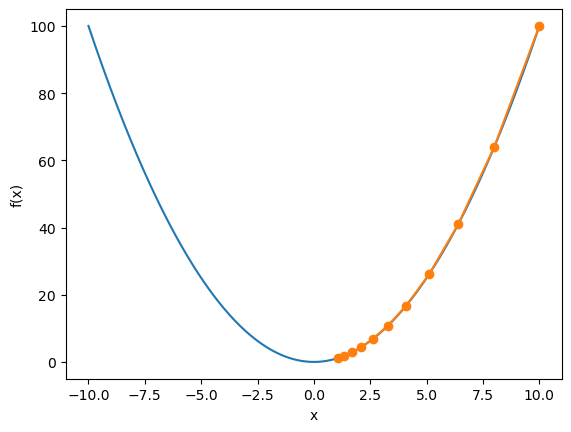

In [19]:
def show_trace(results, f):
  n = max(abs(min(results)), abs(max(results)))
  f_line = torch.arange(-n,n,0.01)
  plt.plot(f_line,[f(x) for x in f_line],'-')
  plt.plot(results,[f(x) for x in results],'-o')
  plt.xlabel('x')
  plt.ylabel('f(x)')

show_trace(results, f)

# 多元梯度下降

In [20]:
def train_2d(trainer, steps=20, f_grad=None):
  x1,x2,s1,s2 = -5, -2, 0, 0
  results = [(x1,x2)]
  for i in range(steps):
    if f_grad:
      x1,x2,s1,s2 = trainer(x1,x2,s1,s2,f_grad)
    else:
      x1,x2,s1,s2 = trainer(x1,x2,s1,s2)
    results.append((x1,x2))
  print(f'epoch {i+1}, x1: {float(x1):f}, x2: {float(x2):f}')
  return results

In [21]:
def show_trace_2d(f, results):
  """显示优化过程中2d变量的轨迹"""
  plt.plot(*zip(*results),'-o',color='#ff7f0e')
  x1,x2 = torch.meshgrid(torch.arange(-5.5,1.0,0.1),
                         torch.arange(-3.0,1.0,0.1),indexing='ij')
  plt.contour(x1,x2,f(x1,x2),colors='#1f77b4')
  plt.xlabel('x1')
  plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


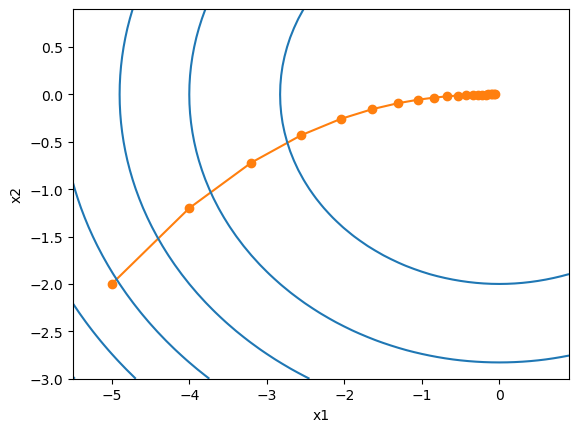

In [23]:
def f_2d(x1,x2):
  return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1,x2):
  return (2 * x1, 4 * x2)

def gd_2d(x1,x2,s1,s2,f_grad):
  g1,g2 = f_grad(x1,x2)
  return (x1 - eta * g1, x2 - eta * g2,0,0)
eta = 0.1
show_trace_2d(f_2d,train_2d(gd_2d,f_grad=f_2d_grad))